 [aiplanet.com]

### Context and objective
A combined-cycle power plant uses both gas and a steam turbine together to produce up to 50 percent more electricity from the same fuel than a traditional simple-cycle plant. The waste heat from the gas turbine is routed to the nearby steam turbine, which generates extra power.

All the UN Member States have to submit a report on the combined cycle power plant to the United Nations. The Power Plant officials of Mexico are devising a way to predict the net hourly electrical energy output (PE) of the plant. You are appointed as the chief for this operation. Create a Machine Learning Model to solve this problem efficiently.

### Evaluation Criteria
Submissions are evaluated using RMSE Value. How do we do it? 

Once you generate and submit the target variable predictions on evaluation dataset, your submissions will be compared with the true values of the target variable. 

The True or Actual values of the target variable are hidden on the DPhi Practice platform so that we can evaluate your model's performance on unseen data. Finally, an RMSE Value for your model will be generated and displayed

### About the dataset

The data points were collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the power plant was set to work with a full load. Features consist of hourly average ambient variables - Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

To load the dataset in your jupyter notebook, use the below command:

**import pandas as pd
ccpp_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/CCPP/Training_set_ccpp.csv')**

### Data Description

The dataset contains 9568 observations with 5 features/variables.

* **AT**: Ambient Temperature - Numerical (values ranges from 1.81°C to 37.11°C)
* **AP**: Ambient Pressure - Numerical (values ranges from 992.89 to 1033.30 milibar)
* **RH**: Relative Humidity - Numerical (values ranges from 25.56% to 100.16%)
* **EV**: Exhaust Vacuum - Numerical (values ranges from 25.36-81.56 cm Hg)
* **PE**: Net hourly electrical energy output - Numerical (values ranges from 420.26-495.76 MW)

### Evaluation Dataset
Load the evaluation dataset (name it as 'CCPP_eval'). You can load the data using the below command.

**CCPP_eval = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/CCPP/Testing_set_ccpp.csv')**

### Reference
This dataset is downloaded from the UCI Machine Learning Repository - [https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant]

### Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ccpp_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/CCPP/Training_set_ccpp.csv')

In [3]:
ccpp_data.head()

,AT,EV,AP,RH,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68


In [4]:
ccpp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6410 non-null   float64
 1   EV      6410 non-null   float64
 2   AP      6410 non-null   float64
 3   RH      6410 non-null   float64
 4   PE      6410 non-null   float64
dtypes: float64(5)
memory usage: 250.5 KB


In [6]:
ccpp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,6410.0,19.652120,7.433792,1.81,13.5800,20.420,25.7200,35.56
EV,6410.0,54.298786,12.685055,25.36,41.7600,52.080,66.5400,81.56
AP,6410.0,1013.227959,5.932562,992.89,1009.0700,1012.955,1017.2575,1033.30
RH,6410.0,73.324212,14.675569,26.30,63.3525,74.980,84.8975,100.16
PE,6410.0,454.363276,17.060129,420.26,439.8325,451.440,468.2700,495.76


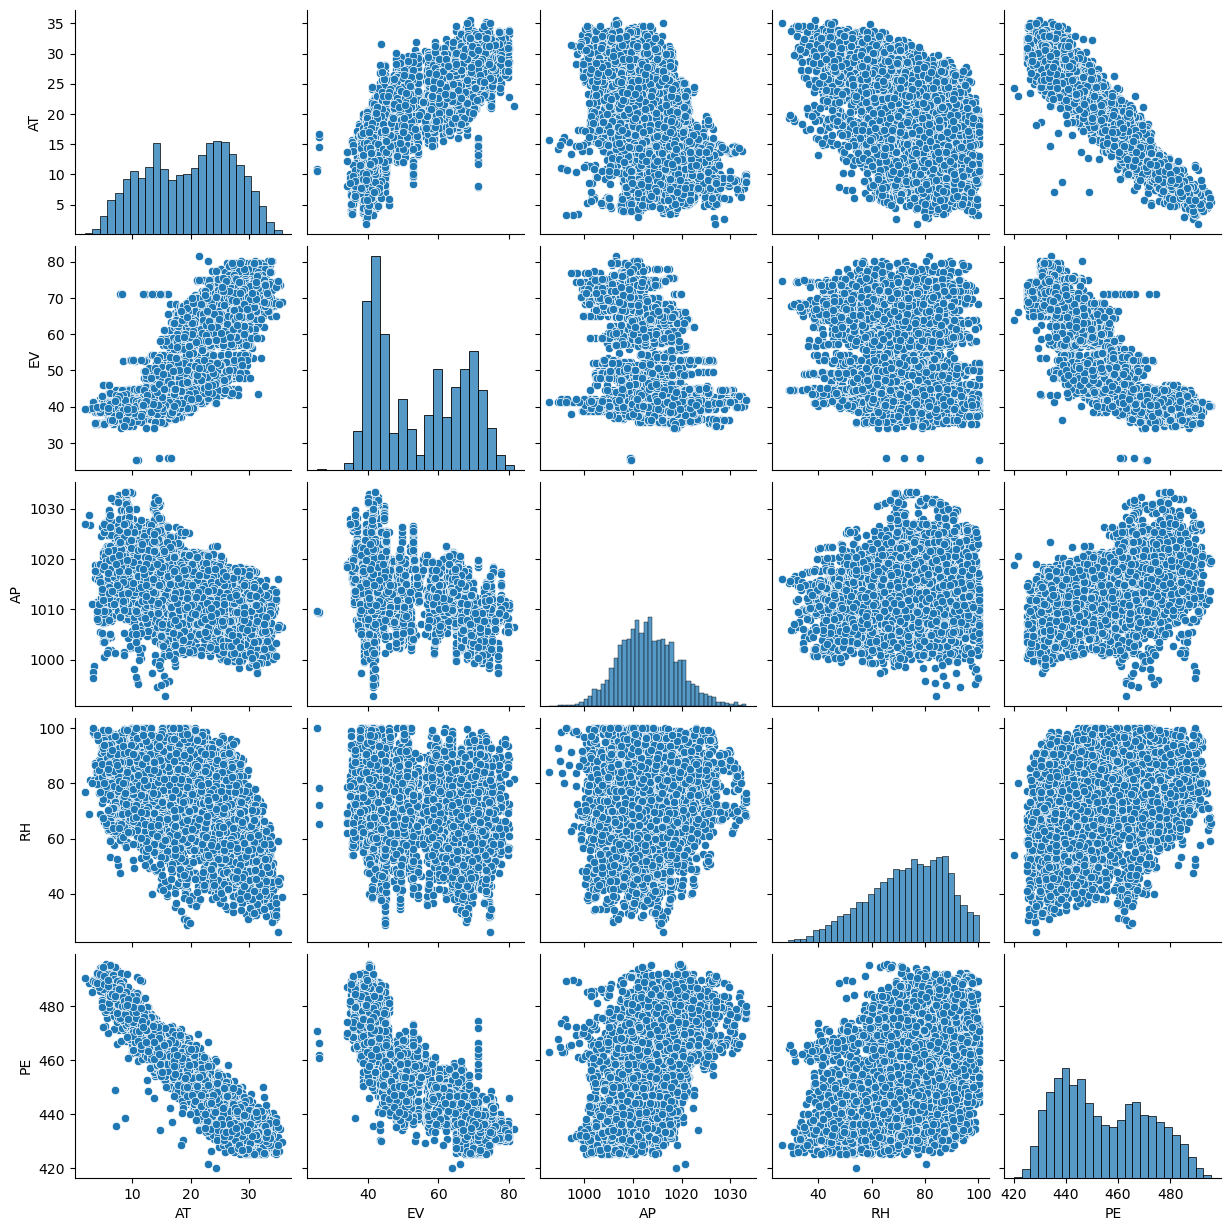

In [7]:
sns.pairplot(ccpp_data)

*from the paiplot above it signifies that MEDV has major correlation with CRIM,INDUS,NOX,RM,AGE,DIS,LSTAT*

In [8]:
ccpp_data.corr()

,AT,EV,AP,RH,PE
AT,1.000000,0.842640,-0.507147,-0.547406,-0.948487
EV,0.842640,1.000000,-0.413284,-0.310806,-0.869070
AP,-0.507147,-0.413284,1.000000,0.110869,0.514595
RH,-0.547406,-0.310806,0.110869,1.000000,0.393906
PE,-0.948487,-0.869070,0.514595,0.393906,1.000000


<Axes: >

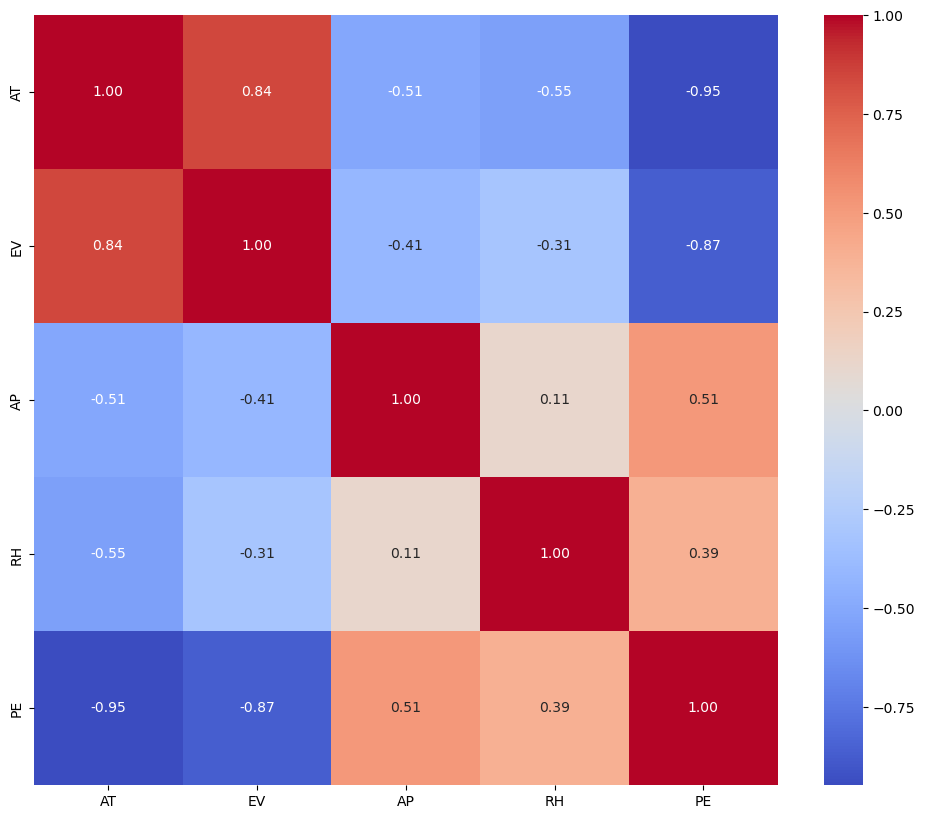

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(ccpp_data.corr(),annot=True, cmap='coolwarm', fmt=".2f")

<Axes: xlabel='AP', ylabel='PE'>

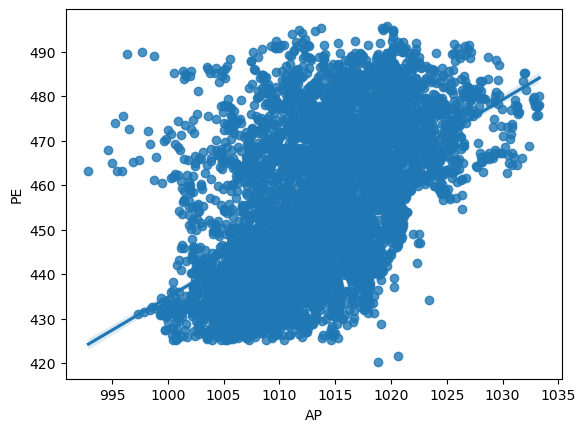

In [12]:
sns.regplot(ccpp_data,y='PE',x='AP')

### Creating target (dependent variables) and predictors (independent variables)

In [13]:
X=ccpp_data.drop('PE',axis=1)
y=ccpp_data['PE']

### Decision Tree Regression

In [33]:
#train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=78)

#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Linear Regression
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()

#fitting model
dr.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

### Prediction

In [34]:
y_pred=dr.predict(X_test_scaled)

### Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(ccpp_data.PE.mean())

3.3048127925117
23.818478705148202
4.880417882225681
454.36327613104527


In [22]:
CCPP_eval = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/CCPP/Testing_set_ccpp.csv')

In [23]:
predict_eval=dr.predict(CCPP_eval)

C:\Users\bharath.m\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [29]:
submission = pd.DataFrame({'prediction': predict_eval})
submission.to_csv('ccpp_data_pe.csv', index=False)